## End-to-End heart disease 

We are going to create a model that will predict whether the  person has a heart-disease or not
We are going to use different inbuild libraries

We're going  to take the following approach

1. Problem Defination
2. Data
3. Prediction
4. Evaluation 
5. features 
6. Modelling
7. Experimentation

## Problem Defination: 

>Given Clinical parameters about a patient we need to Predcit whether the person has a heartdisease or not. This data is an example of binary classification. 

## Data 

> Data is originally obtained from UCI machine learning respository 

## Evaluation 

> Our expectations is to predict 95% accuracy whether the person may have heart disease or not 



In [1]:
## import all exploratory data analysis (EDA) tools and libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plot we appear inside the notebook 
%matplotlib inline

# import all models from sklearn that we need 

from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# model evaluations 

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve,average_precision_score
from sklearn.metrics import plot_roc_curve



## Load Data 

In [2]:
heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

heart_disease.shape

(303, 14)

## Data Exploration 

The goal is to find more about the data and to become a subject matter or expert about the data that we have 

1. What questions are you trying to solve 
2. What kind of problem is this and what are the different data types used 
3. what are the missing values and how we are going to fill the missing values 
4. what are the outliers and why should we care about that 
5. how can you add, remove or change the features for better predictions 


In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# let's check how many class are there 

heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

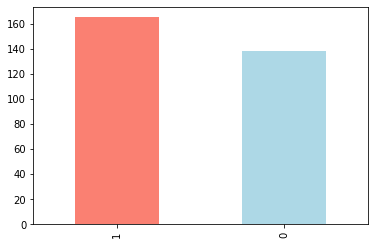

In [6]:
heart_disease["target"].value_counts().plot(kind="bar", color = ["salmon","lightblue"])

In [7]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart_disease frequency according to sex


In [10]:
heart_disease["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# compare sex column with target column
pd.crosstab(heart_disease["target"], heart_disease["sex"])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text xticklabel objects>)

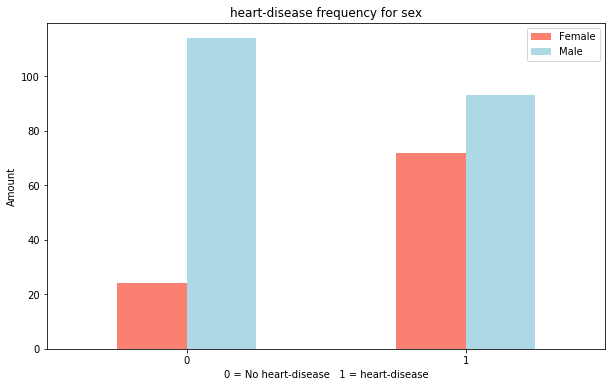

In [12]:
pd.crosstab(heart_disease["target"], heart_disease["sex"]).plot(kind="bar",
                                                                figsize=(10,6),
                                                                color = ["salmon","Lightblue"]
                                                               )
plt.title("heart-disease frequency for sex")
plt.xlabel("0 = No heart-disease   1 = heart-disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

In [13]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
# compare age and target columns 

pd.crosstab(heart_disease["age"], heart_disease["target"])

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


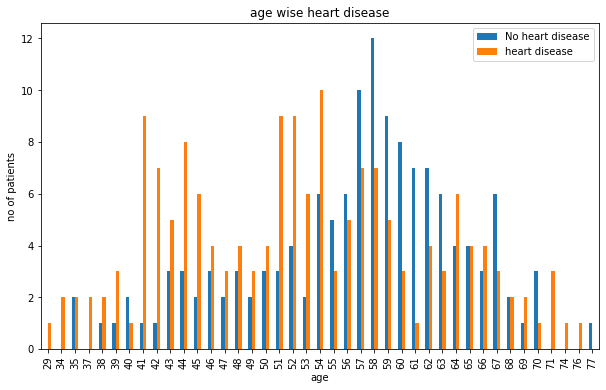

In [15]:
pd.crosstab(heart_disease["age"],heart_disease["target"]).plot(kind="bar",
                                                               figsize=(10,6))
plt.title("age wise heart disease")
plt.ylabel("no of patients")
plt.legend(["No heart disease","heart disease"])
#plt.xticks(rotation=0)

## Age vs Max heart rate for heart disease 

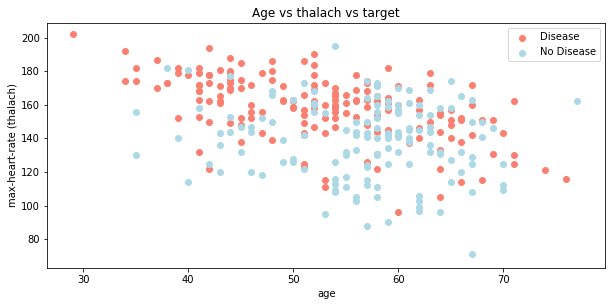

In [16]:
plt.figure(figsize=(10,4.5))

plt.scatter(heart_disease.age[heart_disease.target==1],
            heart_disease.thalach[heart_disease.target==1],
            color = "salmon")

plt.scatter(heart_disease.age[heart_disease.target==0],
            heart_disease.thalach[heart_disease.target==0],
            color = "lightblue")
plt.title("Age vs thalach vs target")
plt.xlabel("age")
plt.ylabel("max-heart-rate (thalach)")
plt.legend(["Disease","No Disease"])

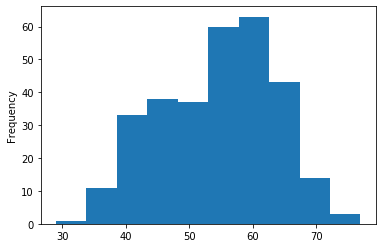

In [17]:
# check the distribution of age column with the help of histogram 

heart_disease["age"].plot(kind="hist")

# heart_disease.age.plot(kind="hist")


**Distributions are generally used for detect outliers in our data**

### Heart disease frequency according to chestpain

In [18]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**cp is a chest pain**

In [19]:
# compare cp column to target column

pd.crosstab(heart_disease["cp"], heart_disease["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


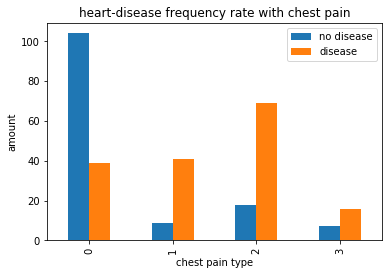

In [20]:
pd.crosstab(heart_disease["cp"], heart_disease["target"]).plot(kind="bar")
plt.title("heart-disease frequency rate with chest pain")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["no disease","disease"])

In [21]:
# Corelation matrix 

heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


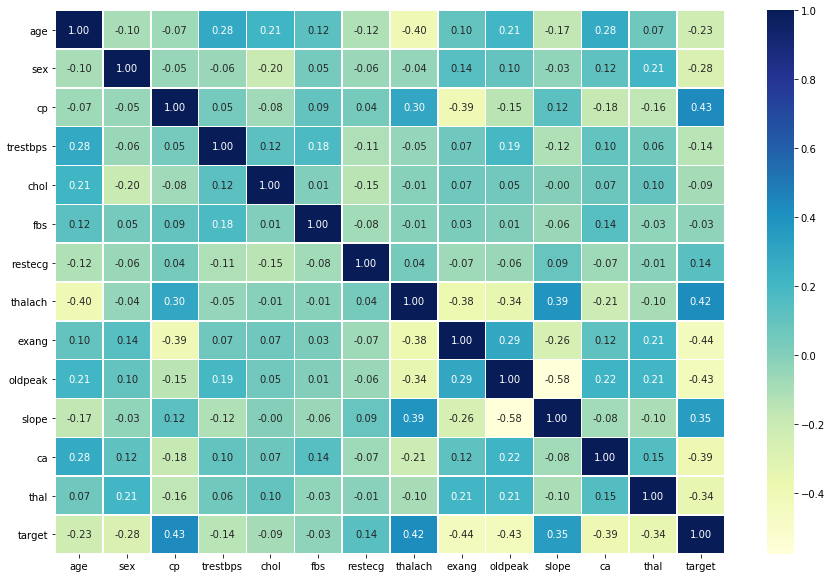

In [22]:
correlation_matrix = heart_disease.corr()

fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix,
                 annot=True, 
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu"
                 )

In [23]:
# now we have a data 

# split the data into X features and y labels 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

In [24]:
# split the data into train and test set 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [25]:
len(X_train), len(y_train)

(242, 242)

In [26]:
len(X_test),len(y_test)

(61, 61)

So we have splited the train and test set 80% of data is under training set and 20% is for the test set while training we will generate some patterns from our data. 

## Modelling

In [27]:
# choose a right estimator/model 

We're trying three machine learning model 

1. Logistic Regression
2. KNearest Neighbors 
3. RandomForest

In [28]:
np.random.seed(13)
models = {"Logistic-regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random-forest":RandomForestClassifier()}

def fit_and_scores(models,X_train,X_test,y_train,y_test):
    # Make a dictionary to keep model scores 
    model_scores = {}
    # looop through models 
    for name,model in models.items():
        # fit the model 
        model.fit(X_train,y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

model_scores = fit_and_scores(models=models,
               X_train=X_train,
               X_test=X_test,
               y_train=y_train,
               y_test=y_test)
model_scores

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic-regression': 0.7540983606557377,
 'KNN': 0.6557377049180327,
 'Random-forest': 0.7213114754098361}

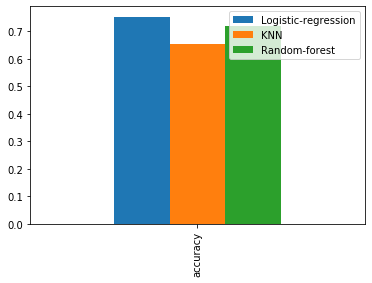

In [29]:
# compare the models to see which one is the best 

model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare
model_compare.plot.bar()

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

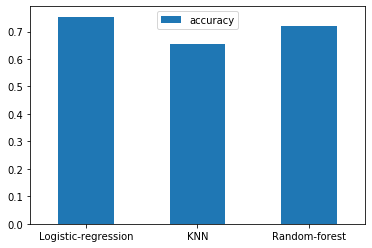

In [30]:
model_compare.T.plot(kind="bar")
plt.xticks(rotation=0)

Now we'have got our a baseline model.. and we know model first predictions aren't always correct or accurate so what should we do to improve a model 

let's look the following:
* Tuning hyperparametrs 
* feature importance 
* confusion-matrix
* cross-validation-score
* Precision
* recall 
* F1 score 
* Classification report 
* Roc curve 
* Area under the curve(Auc)

### Hyperparameter tuning 

let's tune KNN by hand

In [31]:
train_scores = []
test_scores = []

# create a list for different values for n_neighbors
neighbors = range(1,21)

# create a instance 

knn = KNeighborsClassifier()

# loop  through different n-neighbors 

for i in neighbors:
    knn.set_params(n_neighbors=i)

    # fit the model 
    
    knn.fit(X_train,y_train)
    
    # update the training score list b
    
    train_scores.append(knn.score(X_train,y_train))
    
    # update the test scores 
    
    test_scores.append(knn.score(X_test,y_test))


In [32]:
train_scores

[1.0,
 0.78099173553719,
 0.743801652892562,
 0.743801652892562,
 0.768595041322314,
 0.743801652892562,
 0.7396694214876033,
 0.7231404958677686,
 0.7107438016528925,
 0.7107438016528925,
 0.7107438016528925,
 0.6942148760330579,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.71900826446281,
 0.7148760330578512,
 0.7148760330578512,
 0.71900826446281,
 0.7066115702479339]

In [33]:
test_scores

[0.5901639344262295,
 0.5245901639344263,
 0.6557377049180327,
 0.5901639344262295,
 0.6557377049180327,
 0.6065573770491803,
 0.639344262295082,
 0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.6229508196721312,
 0.5737704918032787,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.5901639344262295,
 0.6229508196721312,
 0.5409836065573771,
 0.639344262295082,
 0.6065573770491803]

The KNN best accuracy score is:65.57%


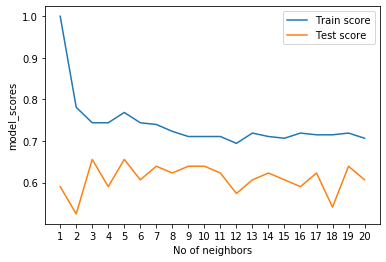

In [34]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("No of neighbors")
plt.ylabel("model_scores")
plt.legend()
plt.xticks(np.arange(1,21,1));
print(f"The KNN best accuracy score is:{max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

we're going to tune:
   * LogisticRegression()
   * RandomForestClassifier()

In [35]:
import numpy as np
np.random.seed(13)

# create a hyperparameter grid for logistic-Regression

log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

# create a hyperparameter grig for RandomForestClassifier

# we used arange bcz it is highly recomended to use continuous distributions
rf_grid = {"n_estimators":np.arange(10,100,60),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(2,20,2)} 

#### Tune by using RandomizedSearchCV

* LogisticRegression()

In [36]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit the logistic model to RandomizedSearchCV
rs_log_reg.fit(X_train,y_train)

# evaluate the best params

rs_log_reg.best_params_

# evaluate the score 

rs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


0.7377049180327869

* RandomForestClassifier()

In [37]:
rs_random_forest = RandomizedSearchCV(RandomForestClassifier(),
                                      param_distributions=rf_grid,
                                      cv=5,
                                      n_iter=20,
                                      verbose=True)
# fit the model 

rs_random_forest.fit(X_train,y_train)

# evalaute the score 

rs_random_forest.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.1s finished


0.7540983606557377

In [38]:
model_scores

{'Logistic-regression': 0.7540983606557377,
 'KNN': 0.6557377049180327,
 'Random-forest': 0.7213114754098361}

We have observed after tuning LogisticRegression model and RandomForest model . Logistic model remains unchanged shows no improvement whereas RandomForest shows slight improvement 

## Hyperparamter tuning with GridSearchCV

In [39]:
# grid search cv on logistic model 

log_reg = {"C":np.logspace(-4,4,30),
           "solver":["liblinear"]}

# instantiate the grid search CV model 

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg,
                          cv = 5,
                          verbose = True
                          )
# fit the model 

gs_log_reg.fit(X_train,y_train)

# evaluate the score 

gs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.7s finished


0.7377049180327869

In [40]:
model_scores

{'Logistic-regression': 0.7540983606557377,
 'KNN': 0.6557377049180327,
 'Random-forest': 0.7213114754098361}

Still there is no improvement after tuning 

## will use this tuned model and perform following 

* ROC curve and Auc score 
* Confusion Matrix 
* Classification report 
* precision
* recall 
* f1 score 
* cross validation 

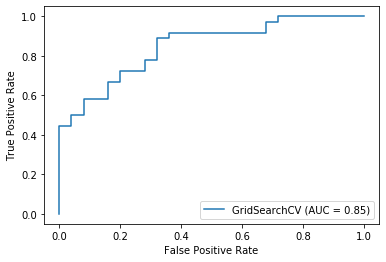

In [41]:
# plot roc curve on tuned model 
# will use the method directly to plot the curve 

# make predictions 

y_preds = gs_log_reg.predict(X_test)

# plot the curve 

roc_curve = plot_roc_curve(gs_log_reg,X_test,y_test)

In [42]:
# confusion matrix 

conf_mat = confusion_matrix(conf_mat)
conf_mat

# plot using seaborn heatmap



NameError: name 'conf_mat' is not defined

some error has occured while plotting confusion matrix 

In [ ]:
print(classification_report(y_test,y_preds))

## Calculate evaluation metrics using cross-validation 

we're going to calculate accuracy,precision,recall and f1 score of our model using cross-validation and we'll use `cross_val_score` with `scoring` parameter

In [ ]:
# check best hyperparameters 

gs_log_reg.best_params_

In [ ]:
# create a classifier with best parameters

clf = LogisticRegression(C=2.592943797404667,
                         solver='liblinear')



In [ ]:
# cross-validated-accuracy 

cross_val_accuracy = cross_val_score(clf,X,y,scoring="accuracy")
cross_val_accuracy = np.mean(cross_val_accuracy)
print(f"The cross-validated-accuracy is:{np.mean(cross_val_accuracy)*100:.2f}%")

In [ ]:
# cross-validated-precision
cross_val_precision = cross_val_score(clf,X,y,scoring="precision")
cross_val_precision = np.mean(cross_val_precision)
print(f"The cross-validated-precision is:{np.mean(cross_val_precision)*100:.2f}%")

In [ ]:
# cross-validated-recall
cross_val_recall = cross_val_score(clf,X,y,scoring="recall")
cross_val_recall = np.mean(cross_val_recall)
print(f"The cross-validated-recall is:{np.mean(cross_val_recall)*100:.2f}%")

In [ ]:
# cross-validated-f1
cross_val_f1 = cross_val_score(clf,X,y,scoring="f1")
cross_val_f1 = np.mean(cross_val_f1)
print(f"The cross-validated-f1 is:{np.mean(cross_val_f1)*100:.2f}%")

In [ ]:
# visualize 

cross_val_metrics = pd.DataFrame({"Accuracy":cross_val_accuracy,
                                  "Precision":cross_val_precision,
                                  "recall":cross_val_recall,
                                  "f1":cross_val_f1},
                                   index = [0])
cross_val_metrics.T.plot.bar(title = "cross-validated-metrics" ,legend=False);

## Feature Importance 

Feature importance is that which feature contrbuted more for the outcome of a machine learning model 

Finding feature is different for each machine learning model 

One way to search for feature importance is to search (model name ) feature importance


In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [51]:
log_reg_clf = LogisticRegression(solver='liblinear',C=29.763514416313132)

log_reg_clf.fit(X_train,y_train)

# attribute coef which stands for coefficent (shows how much columns contribute)

log_reg_clf.coef_

feature_dict = dict(zip(heart_disease.columns,list(log_reg_clf.coef_[0])))
feature_dict

{'age': -0.0027377127052226487,
 'sex': -1.8470761032035907,
 'cp': 0.8640889700169093,
 'trestbps': -0.01351362584256225,
 'chol': -0.0026704486838296806,
 'fbs': -0.36345864110421827,
 'restecg': 0.4055846526856847,
 'thalach': 0.030694762122411953,
 'exang': -1.4044758985741659,
 'oldpeak': -0.3399116478310365,
 'slope': 0.3476329447770797,
 'ca': -0.992523354084002,
 'thal': -1.0702503557470342}

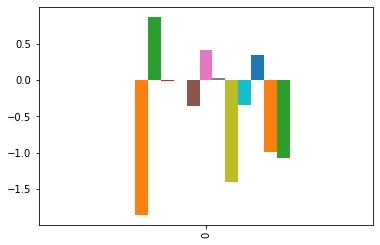

In [54]:
df_feature_imp = pd.DataFrame(feature_dict,index=[0])
df_feature_imp.plot(kind="bar",legend=False)

Text(0.5, 1.0, 'Feature_importance')

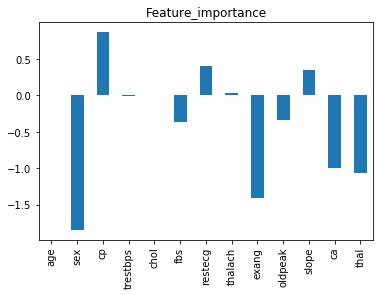

In [57]:
df_feature_imp.T.plot(kind="bar",legend=False)
plt.title("Feature_importance")